In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Connect to SQLite DB (creates file if not exists)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [3]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [13]:
cursor.execute("SELECT COUNT(*) FROM sales")

In [5]:
if cursor.fetchone()[0] == 0:
    sample_rows = [
        ('Laptop', 5, 50000),
        ('Laptop', 2, 50000),
        ('Mouse', 20, 500),
        ('Mouse', 10, 500),
        ('Keyboard', 8, 1500),
        ('Keyboard', 4, 1500),
    ]
    cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_rows)
    conn.commit()

In [12]:
cursor.execute("SELECT * FROM sales")
rows = cursor.fetchall()

for row in rows:
    print(row)

(1, 'Laptop', 5, 50000.0)
(2, 'Laptop', 2, 50000.0)
(3, 'Mouse', 20, 500.0)
(4, 'Mouse', 10, 500.0)
(5, 'Keyboard', 8, 1500.0)
(6, 'Keyboard', 4, 1500.0)


In [14]:
df = pd.read_sql_query("SELECT * FROM sales", conn)
print(df)

   id   product  quantity    price
0   1    Laptop         5  50000.0
1   2    Laptop         2  50000.0
2   3     Mouse        20    500.0
3   4     Mouse        10    500.0
4   5  Keyboard         8   1500.0
5   6  Keyboard         4   1500.0


In [15]:
query = """
SELECT 
    product,
    SUM(quantity) AS total_quantity,
    SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product
"""

In [16]:
df = pd.read_sql_query(query, conn)

In [17]:
df

,product,total_quantity,total_revenue
0,Keyboard,12,18000.0
1,Laptop,7,350000.0
2,Mouse,30,15000.0


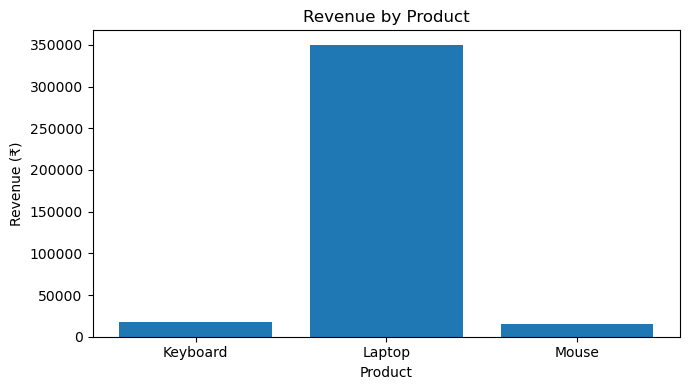

In [18]:
plt.figure(figsize=(7,4))
plt.bar(df['product'], df['total_revenue'])
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue (₹)")
plt.tight_layout()
plt.show()